In [1]:
#import statements
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

In [2]:
housing = pd.read_csv('../data/train.csv')

In [3]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=21)
for train_ix, test_ix in split.split(housing, housing['MSZoning']):
    df_train = housing.loc[train_ix]
    df_test = housing.loc[test_ix]

In [4]:
#House Features

#Continuous features
H_contin_cols = ['YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2',
                 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
                'GrLivArea']

#Ordinal features
H_ordin_cols = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond',
                'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath',
               'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
               'TotRmsAbvGrd', 'Functional']

#Categorical features
H_cat_cols = ['MSSubClass', 'BldgType', 'HouseStyle' ]

In [31]:
#Lot Features

#Continuous features
L_contin_cols = ['LotFrontage', 'LotArea']

#Ordinal features
L_ordin_cols = ['LotShape', 'LandSlope']

#Categorical features
L_cat_cols = ['MSZoning', 'Street', 'Alley', 'Utilities','LandContour',
              'LotConfig',  'Neighborhood', 'Condition1', 'Condition2' ]

In [32]:
#Garage Features

#Continuous features
G_contin_cols = ['GarageYrBlt', 'GarageArea']

#Ordinal features
G_ordin_cols = ['GarageCars', 'GarageQual', 'GarageCond','GarageFinish']

#Categorical features
G_cat_cols = ['GarageType']

In [7]:
#Misc Features

#Continuous features
M_contin_cols = ['MasVnrArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                'ScreenPorch', 'PoolArea', 'MiscVal']

#Ordinal features
M_ordin_cols = ['HeatingQC', 'FireplaceQu', 'PoolQC', 'BsmtExposure']

#Categorical features
M_cat_cols = ['RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
              'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
             'Electrical', 'Fireplaces', 'PavedDrive', 'MiscFeature', 'MoSold', 'YrSold',
             'SaleType', 'SaleCondition', 'Fence']

### House Categorical

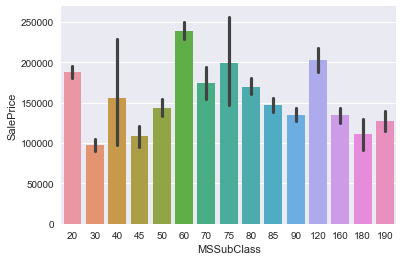

In [8]:
sns.barplot(df_train['MSSubClass'], df_train.SalePrice)

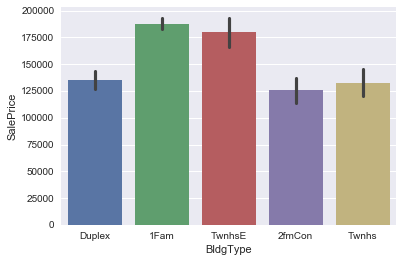

In [9]:
sns.barplot(df_train['BldgType'], df_train.SalePrice)

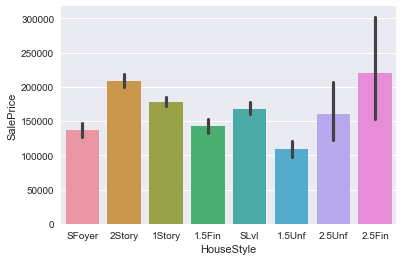

In [10]:
sns.barplot(df_train['HouseStyle'], df_train.SalePrice)

Things to do:

- One_hot_encode 'MSSubClass', 'BldgType', 'HouseStyle'

### Lot Categorical

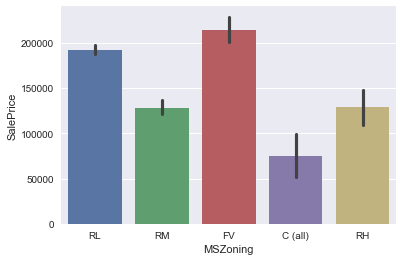

In [11]:
sns.barplot(df_train['MSZoning'], df_train.SalePrice)

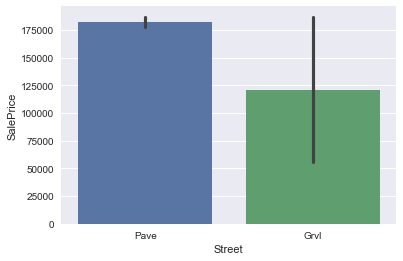

In [12]:
sns.barplot(df_train['Street'], df_train.SalePrice)

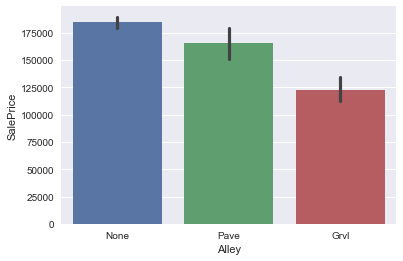

In [14]:
sns.barplot(df_train['Alley'].fillna('None'), df_train.SalePrice)

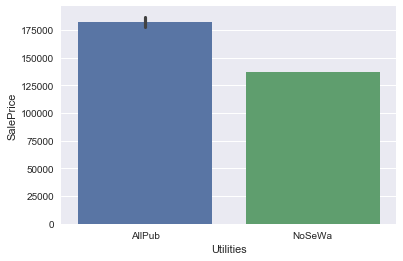

In [15]:
sns.barplot(df_train['Utilities'], df_train.SalePrice)

In [20]:
df_train.groupby(['Utilities'])['Id'].count()

Utilities
AllPub    1167
NoSeWa       1
Name: Id, dtype: int64

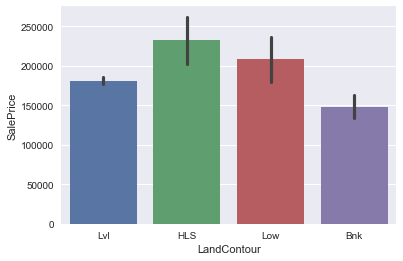

In [21]:
sns.barplot(df_train['LandContour'], df_train.SalePrice)

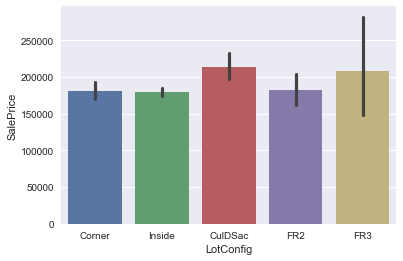

In [22]:
sns.barplot(df_train['LotConfig'], df_train.SalePrice)

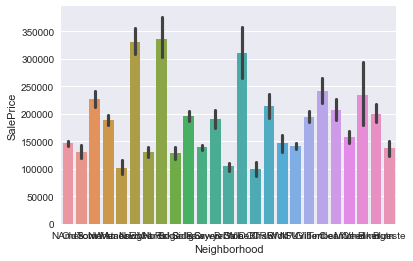

In [23]:
sns.barplot(df_train['Neighborhood'], df_train.SalePrice)

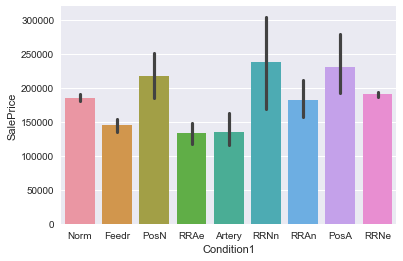

In [25]:
sns.barplot(df_train['Condition1'].fillna('None'), df_train.SalePrice)

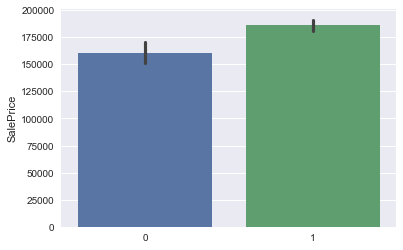

In [27]:
cond_norm = np.where(df_train['Condition1']=='Norm',1,0)
sns.barplot(cond_norm, df_train.SalePrice)

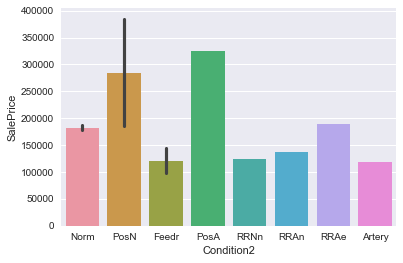

In [26]:
sns.barplot(df_train['Condition2'].fillna('None'), df_train.SalePrice)

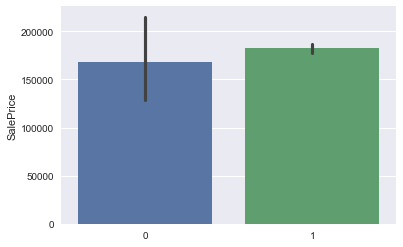

In [28]:
cond2_norm = np.where(df_train['Condition2']=='Norm',1,0)
sns.barplot(cond2_norm, df_train.SalePrice)

Things to do:

- One_hot_encode 'MSZoning', 'Street', 'Alley','LandContour','LotConfig', 'Neighborhood' 
- Fill 'Alley' NA with 'None' 
- Convert 'Utilities' to 1 if all utils 0 if missing some
- Convert 'Condition1' and 'Condition2' to 1 if normal 0 else


### Garage and Misc Categorical

In [ ]:
['GarageType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
              'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
             'Electrical', 'Fireplaces', 'PavedDrive', 'MiscFeature', 'MoSold', 'YrSold',
             'SaleType', 'SaleCondition', 'Fence']

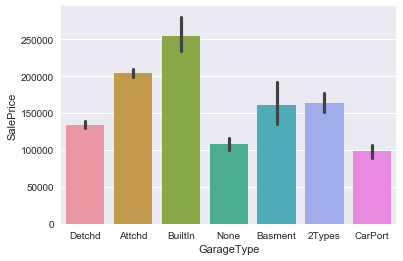

In [29]:
sns.barplot(df_train['GarageType'].fillna('None'), df_train.SalePrice)

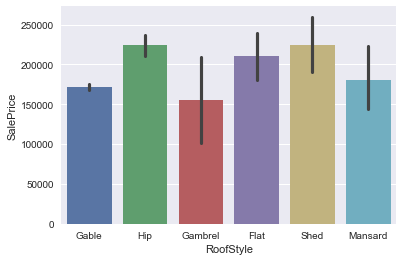

In [36]:
sns.barplot(df_train['RoofStyle'], df_train.SalePrice)

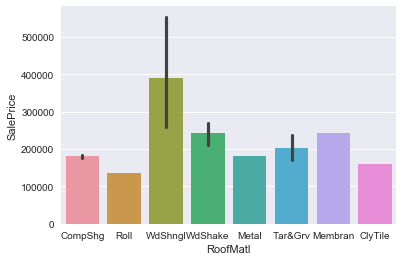

In [40]:
sns.barplot(df_train['RoofMatl'], df_train.SalePrice)

In [41]:
df_train.groupby(['RoofMatl'])['Id'].count()

RoofMatl
ClyTile       1
CompShg    1144
Membran       1
Metal         1
Roll          1
Tar&Grv       9
WdShake       5
WdShngl       6
Name: Id, dtype: int64

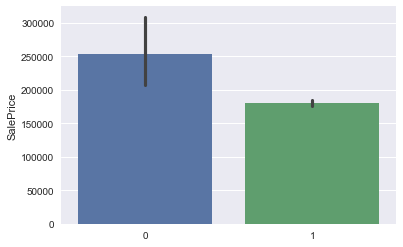

In [42]:
roof_type = np.where(df_train['RoofMatl']=='CompShg',1,0)
sns.barplot(roof_type, df_train.SalePrice)

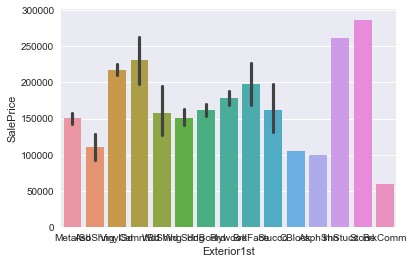

In [43]:
sns.barplot(df_train['Exterior1st'], df_train.SalePrice)

In [93]:
shingles1 = df_train.groupby(['Exterior1st'])['Id'].count()

In [94]:
shingles1 = shingles1[shingles1 <5]


In [95]:
exterior = df_train['Exterior1st']

for roof in shingles1.index:
    exterior = np.where(exterior==roof, 'Other', exterior)

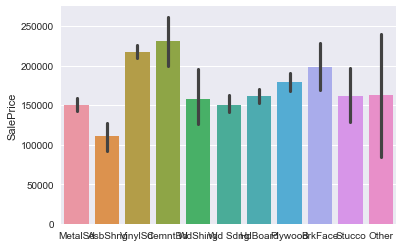

In [96]:
sns.barplot(exterior, df_train.SalePrice)

In [97]:
shingles2 = df_train.groupby(['Exterior2nd'])['Id'].count()

In [98]:
shingles2 = shingles2[shingles2 < 5]

In [99]:
exterior2 = df_train['Exterior2nd']

for roof in shingles2.index:
    exterior2 = np.where(exterior2==roof, 'Other', exterior2)

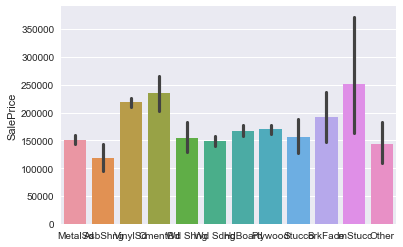

In [100]:
sns.barplot(exterior2, df_train.SalePrice)

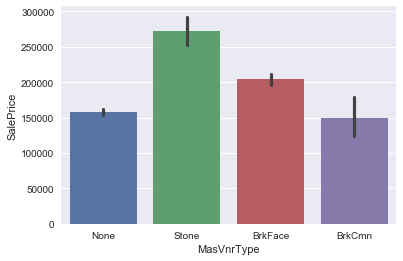

In [101]:
sns.barplot(df_train['MasVnrType'], df_train.SalePrice)

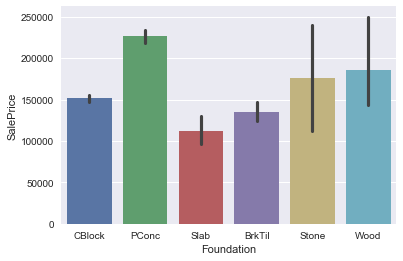

In [102]:
sns.barplot(df_train['Foundation'], df_train.SalePrice)

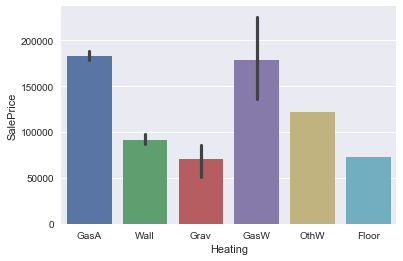

In [103]:
sns.barplot(df_train['Heating'], df_train.SalePrice)

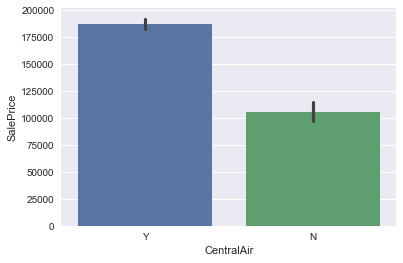

In [104]:
sns.barplot(df_train['CentralAir'], df_train.SalePrice)

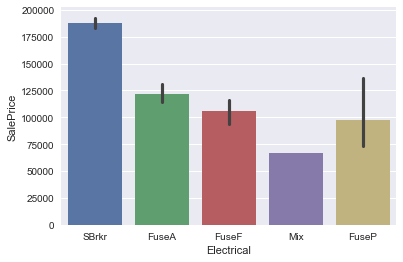

In [105]:
sns.barplot(df_train['Electrical'], df_train.SalePrice)

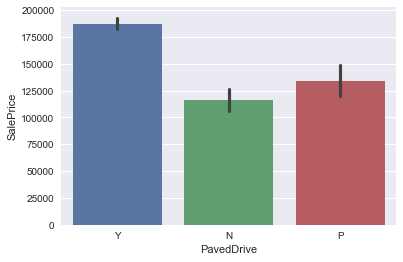

In [107]:
sns.barplot(df_train['PavedDrive'], df_train.SalePrice)

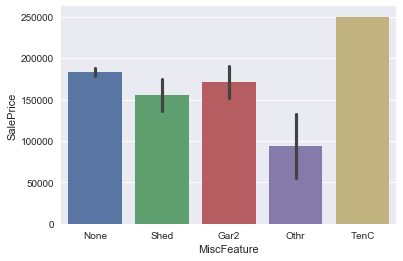

In [109]:
sns.barplot(df_train['MiscFeature'].fillna('None'), df_train.SalePrice)

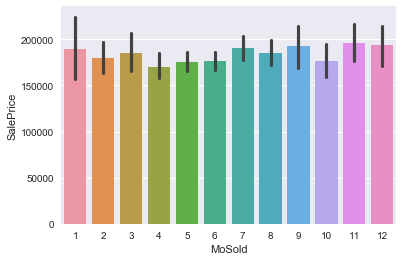

In [110]:
sns.barplot(df_train['MoSold'], df_train.SalePrice)

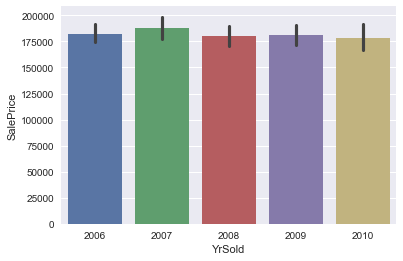

In [111]:
sns.barplot(df_train['YrSold'], df_train.SalePrice)

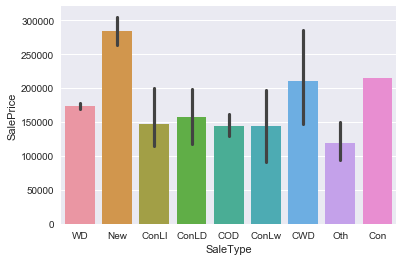

In [112]:
sns.barplot(df_train['SaleType'], df_train.SalePrice)

In [115]:
sale = df_train.groupby(['SaleType'])['Id'].count()
sale = sale[sale < 8]


In [116]:
sale_type = df_train['SaleType']

for s in sale.index:
    sale_type = np.where(sale_type==s, 'Other', sale_type)

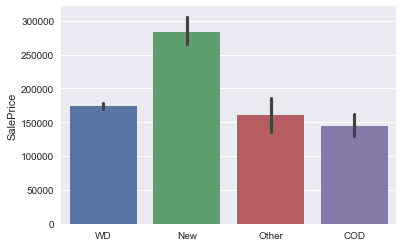

In [117]:
sns.barplot(sale_type, df_train.SalePrice)

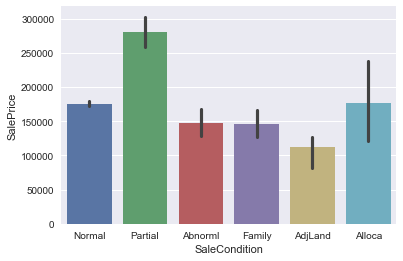

In [118]:
sns.barplot(df_train['SaleCondition'], df_train.SalePrice)

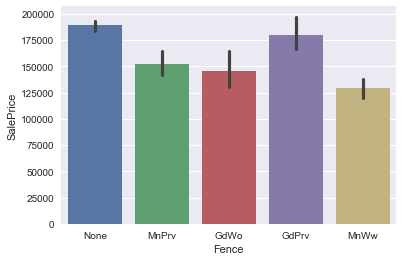

In [120]:
sns.barplot(df_train['Fence'].fillna('None'), df_train.SalePrice)

Things to do:

- Fill 'Fence','GarageType' NA with 'None' 
- One_hot_encode 'GarageType', 'RoofStyle', 'MasVnrType','Foundation',
    'Heating', 'CentralAir','Electrical', 'PavedDrive','MoSold',
    'YrSold','SaleCondition', 'Fence'
- Collapse rare 'Exterior1st', 'Exterior2nd', 'SaleType' to 'Other' then one_hot_encode
- Convert 'RoofMatl' to 1 if CompShg 0 if else
- Drop 'MiscFeature'